**Introduction:**

*OBri Games* is an up and coming video game development company. They have been doing well in the North American market, but would like to expand into the Japan market. Part of the company believes that the market in Japan is beating the market in North America while the rest believe that the focus should remain in the North American market.

**Hypothesis:**

HO: There is no significant difference between the average sale in North America versus in Japan

HA: There is a significant difference between the average sale in North American versus Japan.

**Data:**

The data that has been gathered for my proposal has been collected from [Kaggle]( https://www.kaggle.com/mohalim/video-games-sales) and contains 16,719 observations and 16 variables. The data is a collection of video games, ratings, and sales in North America, Europe, Japan, and other locations. 

In [2]:
import math
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
sns.set()
import warnings
warnings.filterwarnings("ignore")
!pip install PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
downloaded1 = drive.CreateFile({'id':"11M5YqvHQno4mmBgmpmv-a3edjFvEijdh"})
downloaded1.GetContentFile('Video_Games_Sales_as_at_22_Dec_2016.csv')

In [5]:
video_games= pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
video_games.info()
video_games.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


**Method:**

 The data will first be analyzed to ensure that the distributions of sales are close to normal distribution based on their histogram, skewness, and kurtosis. 

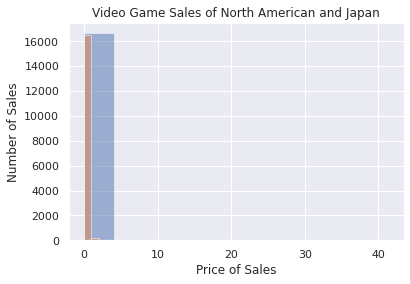

DescribeResult(nobs=16719, minmax=(0.0, 41.36), mean=0.26333034272384714, variance=0.6618047593322848, skewness=18.772105918485533, kurtosis=648.5068664727868)
DescribeResult(nobs=16719, minmax=(0.0, 10.22), mean=0.07760212931395419, variance=0.09536860685274536, skewness=11.207763471631047, kurtosis=194.25308326978453)


In [ ]:
# Plot the histogram

plt.hist(video_games['NA_Sales'], alpha = .5)
plt.hist(video_games['JP_Sales'], alpha = .5)
plt.ylabel('Number of Sales')
plt.xlabel('Price of Sales')
plt.title('Video Game Sales of North American and Japan')
plt.show()

print(stats.describe(video_games['NA_Sales']))
print(stats.describe(video_games['JP_Sales']))

Text(0.5, 1.0, 'Video Game Distribution of Sales between North American and Japan')

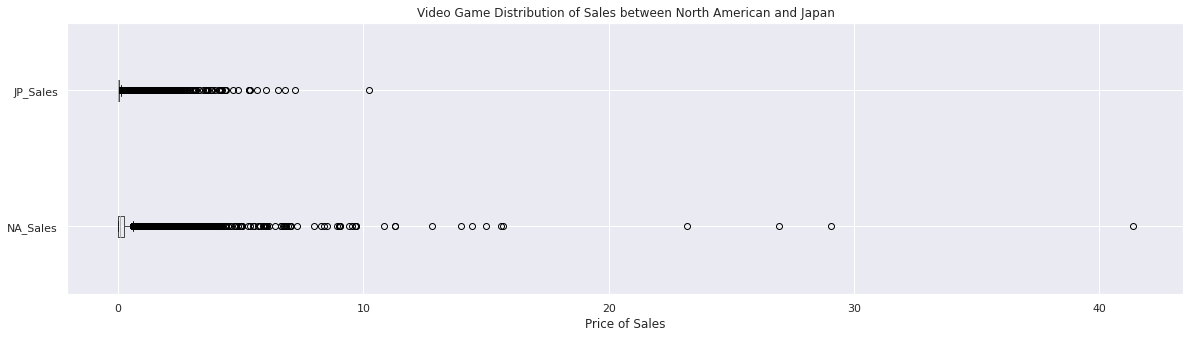

In [ ]:
video_games.boxplot(column=['NA_Sales','JP_Sales'],figsize=(20,5), vert=False)
plt.xlabel('Price of Sales')
plt.title('Video Game Distribution of Sales between North American and Japan')


The histogram and skewness indicate a heavy right side tail which is confirmed by the boxplot. Since there seems to be many outliers, we will taka a look at the mean and the standard deviation and remove any outliers. 

In [ ]:
Q1 = video_games.quantile(0.25)
Q3 = video_games.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

NA_Sales        0.24
JP_Sales        0.04
Global_Sales    0.41
dtype: float64


In [ ]:
video_games_clean = video_games[~((video_games < (Q1 - 1.5 * IQR)) |(video_games > (Q3 + 1.5 * IQR))).any(axis=1)]

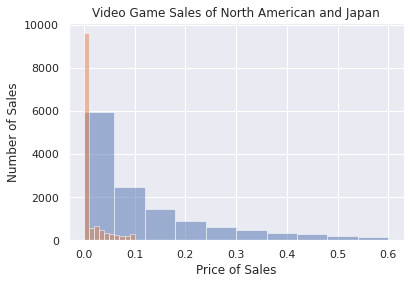

DescribeResult(nobs=12849, minmax=(0.0, 0.6), mean=0.11056813759825668, variance=0.01706930670886774, skewness=1.497994048180542, kurtosis=1.7179802489938742)
DescribeResult(nobs=12849, minmax=(0.0, 0.1), mean=0.010175110903572263, variance=0.0004831495953040911, skewness=2.390416414720167, kurtosis=5.023286681317227)


In [ ]:

plt.hist(video_games_clean['NA_Sales'], alpha = .5)
plt.hist(video_games_clean['JP_Sales'], alpha = .5)
plt.ylabel('Number of Sales')
plt.xlabel('Price of Sales')
plt.title('Video Game Sales of North American and Japan')
plt.show()

print(stats.describe(video_games_clean['NA_Sales']))
print(stats.describe(video_games_clean['JP_Sales']))

Text(0.5, 1.0, 'Video Game Distribution of Sales between North American and Japan')

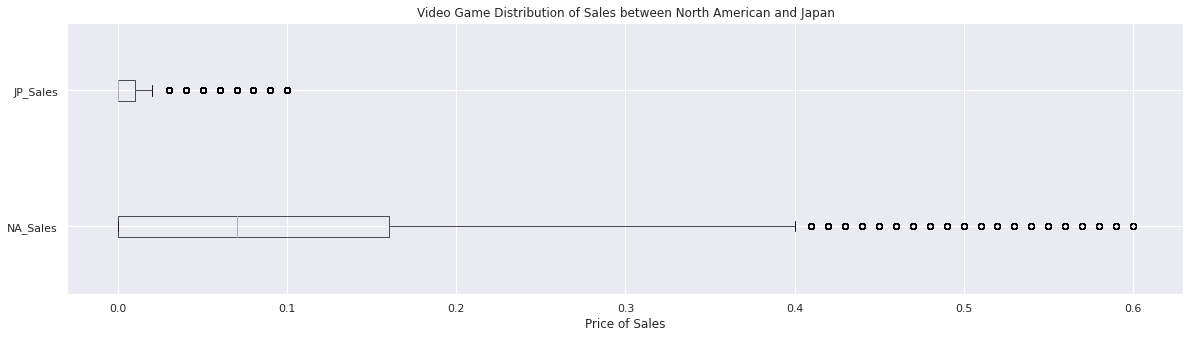

In [ ]:
video_games_clean.boxplot(column=['NA_Sales','JP_Sales'],figsize=(20,5), vert=False)
plt.xlabel('Price of Sales')
plt.title('Video Game Distribution of Sales between North American and Japan')

The histogram and skewness still indicate a heavy right side tail. The kurtosis numbers are also still higher than zero indicating that the peak of the graph is very steep. 

**Shapiro-Wilk Test**

This test will look at both sets of data to determine if they have normal distribution. The Sharpiro-Wilks test is a statistical test used to see if the data's distribution is significantly different than normal distribution.

In [ ]:
stats.shapiro(video_games_clean['NA_Sales'])

(0.8091759085655212, 0.0)

In [ ]:
stats.shapiro(video_games_clean['JP_Sales'])

(0.5352722406387329, 0.0)

The W statistic is smaller than one, indicating there is  more divergence  between the distribution of the data and a normal distribution. 

Each of the tests has indicated that the data is not normally distributed. A non-parametric test will need to be conducted.  The Kruskal-Wallis test is a non-parametric method for testing whether samples originate from the same distribution. It is used for comparing two or more independent samples of equal or different sample sizes. This test can also be used to compare more than two groups. 

In [ ]:
stats.kruskal(video_games_clean['NA_Sales'], video_games_clean['JP_Sales'])

KruskalResult(statistic=8173.080792704278, pvalue=0.0)

The Kruskal-Wallis test is showing that there is a difference between the data sets. The low p-value shows that that this test is significant and the difference would be reflected in a larger population. We can reject the null hypothesis. 

Let's take a closer look at the difference in the data. We will now take a look at the medians of both data sets by using a boxplot. Due to the skew in the data, the median will have a better representation of the data. 

In [ ]:
video_games_clean.median()

NA_Sales        0.07
JP_Sales        0.00
Global_Sales    0.11
dtype: float64

In [ ]:
def get_median_diff(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_median = array_1.median()
    sample_2_median = array_2.median()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    median_difference = sample_2_median - sample_1_median
    return("The difference of the medians is "+str(median_difference))
print(get_median_diff(video_games_clean['NA_Sales'], video_games_clean['JP_Sales']))

The difference of the medians is -0.07


**Results**

The tests on the data has shown that there is a difference in sales between North America and Japan. With that information, we can reject the null hypothesis.The boxplot shows that there are more sales that have a higher value in North America.Looking at the medians specifically, they show that the median of sales in Japan is $0.07 lower than the median sales in North America. The focus of marketing and sales should remain in the North American markets.  
 
The data was gathered by an outside party, which means it is not possible to eliminate all bias since the sample may not be random. However, since there was not an actual experiment that was performed, there is no chance of contextual or observer bias.  


**Recommendations**

Sales are higher in North American than in Japan. It may be worth looking into the different genres to see if this is true for all types of games, or just certain categories. 

 A quick glance at the different genres of games shows that other than Role-Playing, North American sales on average are higher than Japan sales. A more thorough look at this data would be advised. 

In [7]:
video_games.groupby('Genre', as_index=False)['NA_Sales','JP_Sales'].median()

,Genre,NA_Sales,JP_Sales
0,Action,0.10,0.00
1,Adventure,0.00,0.01
2,Fighting,0.08,0.02
3,Misc,0.08,0.00
4,Platform,0.14,0.00
5,Puzzle,0.05,0.00
6,Racing,0.10,0.00
7,Role-Playing,0.04,0.05
8,Shooter,0.12,0.00
9,Simulation,0.07,0.00


In [ ]:
video_games.groupby('Genre', as_index=False)['NA_Sales','JP_Sales'].mean()

,Genre,NA_Sales,JP_Sales
0,Action,0.260834,0.047905
1,Adventure,0.080783,0.040138
2,Fighting,0.263086,0.103039
3,Misc,0.232726,0.061777
4,Platform,0.501689,0.147331
5,Puzzle,0.211845,0.098810
6,Racing,0.287710,0.045404
7,Role-Playing,0.220540,0.236973
8,Shooter,0.447649,0.029297
9,Simulation,0.208455,0.072998


In [ ]:
video_games.max()

NA_Sales        41.36
JP_Sales        10.22
Global_Sales    82.53
dtype: float64

In [6]:
video_games.min()

Platform           2600
Year_of_Release    1980
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales       0.01
Critic_Score         13
Critic_Count          3
User_Count            4
dtype: object